In [32]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Load the dataset

In [33]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [34]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [35]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Normalise the training data

In [36]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Build the CNN

In [37]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [38]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy','mean_squared_error'])

In [39]:
cnn.fit(X_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 65s 41ms/step - loss: 1.4506 - accuracy: 0.4835 - mean_squared_error: 27.6329
Epoch 2/50
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0957 - accuracy: 0.6163 - mean_squared_error: 27.6468
Epoch 3/50
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9747 - accuracy: 0.6612 - mean_squared_error: 27.6525
Epoch 4/50
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8931 - accuracy: 0.6902 - mean_squared_error: 27.6562
Epoch 5/50
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8268 - accuracy: 0.7127 - mean_squared_error: 27.6593
Epoch 6/50
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7731 - accuracy: 0.7291 - mean_squared_error: 27.6618
Epoch 7/50
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7249 - accuracy: 0.7478 - mean_squared_error: 27.6639
Epoch 8/50
1563/1563 [==============================] - 64s 41

In [40]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 2.9205 - accuracy: 0.6648 - mean_squared_error: 27.6907


[2.92051100730896, 0.6647999882698059, 27.690675735473633]

In [41]:
y_pred = cnn.predict(X_test)

In [42]:
y_classes = [np.argmax(element) for element in y_pred]

In [43]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

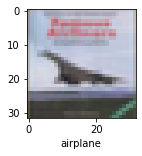

In [44]:
plot_sample(X_test, y_test,3)

In [45]:
classes[y_classes[3]]

'airplane'